In [1]:
import xarray as xr
import copernicusmarine
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

d:\Development\Anaconda3\envs\OHW24\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def copernicus(ID,lon,lat,time,var,username='pwalfir',password='PedroW100%'):
        # Set parameters
    data_request = {
       "dataset" : ID,
       "longitude" : lon, 
       "latitude" : lat,
       "time" : time,
       "variables" : var
    }

    # Load xarray dataset
    dat = copernicusmarine.open_dataset(
        dataset_id = data_request["dataset"],
        minimum_longitude = data_request["longitude"][0],
        maximum_longitude = data_request["longitude"][1],
        minimum_latitude = data_request["latitude"][0],
        maximum_latitude = data_request["latitude"][1],
        start_datetime = data_request["time"][0],
        end_datetime = data_request["time"][1],
        variables = data_request["variables"],
        username  = username,
        password = password
    )
    return dat

## AVISO

In [3]:
dat_aviso = copernicus("cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D",
                       [-30, -26],
                       [-30,-26],
                       ["1993-01-01", "2021-06-30"],
                       ["adt"])

Fetching catalog: 100%|██████████| 3/3 [00:16<00:00,  5.62s/it]
INFO - 2024-08-29T17:53:30Z - Dataset version was not specified, the latest one was selected: "202112"
INFO - 2024-08-29T17:53:30Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-08-29T17:53:33Z - Service was not specified, the default one was selected: "arco-time-series"


In [4]:
dat_aviso

<xarray.Dataset> Size: 21MB
Dimensions:    (time: 10408, latitude: 16, longitude: 16)
Coordinates:
  * latitude   (latitude) float32 64B -29.88 -29.62 -29.38 ... -26.38 -26.12
  * longitude  (longitude) float32 64B -29.88 -29.62 -29.38 ... -26.38 -26.12
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
Data variables:
    adt        (time, latitude, longitude) float64 21MB ...
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged all satellites Global Ocean Gr...

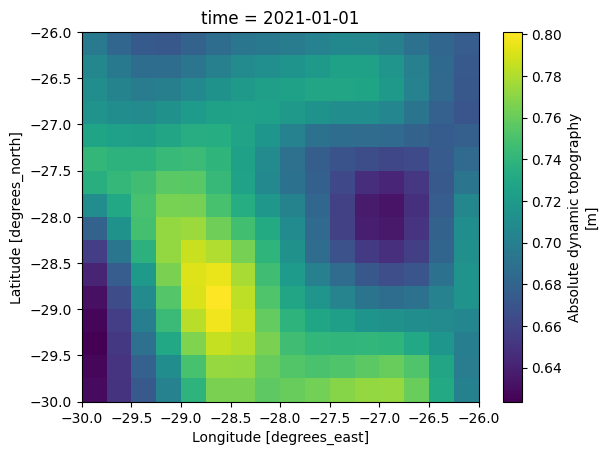

In [5]:
dat_aviso.adt.sel(time="2021-01-01T00:00:00.000000000").plot()

## GLORYS

In [6]:
dat_glorys = copernicus("cmems_mod_glo_phy_my_0.083deg_P1D-m",
                        [-31, -25],
                        [-31,-25],
                        ["1993-01-01", "2021-06-30"],
                        ["zos"])


INFO - 2024-08-29T17:54:23Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2024-08-29T17:54:23Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-08-29T17:54:26Z - Service was not specified, the default one was selected: "arco-time-series"


In [7]:
dat_glorys

<xarray.Dataset> Size: 444MB
Dimensions:    (time: 10408, latitude: 73, longitude: 73)
Coordinates:
  * latitude   (latitude) float32 292B -31.0 -30.92 -30.83 ... -25.08 -25.0
  * longitude  (longitude) float32 292B -31.0 -30.92 -30.83 ... -25.08 -25.0
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
Data variables:
    zos        (time, latitude, longitude) float64 444MB ...
Attributes: (12/24)
    Conventions:        CF-1.4
    bulletin_date:      2021-07-07 00:00:00
    bulletin_type:      operational
    comment:            CMEMS product
    domain_name:        GL12
    easting:            longitude
    ...                 ...
    northing:           latitude
    references:         http://www.mercator-ocean.fr
    source:             MERCATOR GLORYS12V1
    title:              daily mean fields from Global Ocean Physics Analysis ...
    z_max:              5727.9169921875
    z_min:              0.49402499198913574

In [8]:
dat_dow = dat_glorys.rolling(latitude=3,longitude=3,center=True).mean()

In [9]:
dat_dow = dat_dow.interp_like(dat_aviso)

In [10]:
lati = np.arange(dat_aviso.latitude.min(),dat_aviso.latitude.max()+(1/12),1/12)
loni = np.arange(dat_aviso.longitude.min(),dat_aviso.longitude.max()+(1/12),1/12)

In [11]:
dat_glorys_i = dat_glorys.interp(latitude=lati,longitude=loni)

In [12]:
dat_glorys_i

<xarray.Dataset> Size: 176MB
Dimensions:    (time: 10408, latitude: 46, longitude: 46)
Coordinates:
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
  * latitude   (latitude) float64 368B -29.88 -29.79 -29.71 ... -26.21 -26.13
  * longitude  (longitude) float64 368B -29.88 -29.79 -29.71 ... -26.21 -26.13
Data variables:
    zos        (time, latitude, longitude) float64 176MB 0.2257 ... 0.3037
Attributes: (12/24)
    Conventions:        CF-1.4
    bulletin_date:      2021-07-07 00:00:00
    bulletin_type:      operational
    comment:            CMEMS product
    domain_name:        GL12
    easting:            longitude
    ...                 ...
    northing:           latitude
    references:         http://www.mercator-ocean.fr
    source:             MERCATOR GLORYS12V1
    title:              daily mean fields from Global Ocean Physics Analysis ...
    z_max:              5727.9169921875
    z_min:              0.49402499198913574

In [13]:
dat_dow

<xarray.Dataset> Size: 21MB
Dimensions:    (time: 10408, latitude: 16, longitude: 16)
Coordinates:
  * latitude   (latitude) float32 64B -29.88 -29.62 -29.38 ... -26.38 -26.12
  * longitude  (longitude) float32 64B -29.88 -29.62 -29.38 ... -26.38 -26.12
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
Data variables:
    zos        (time, latitude, longitude) float64 21MB 0.2257 0.2153 ... 0.3028
Attributes: (12/24)
    Conventions:        CF-1.4
    bulletin_date:      2021-07-07 00:00:00
    bulletin_type:      operational
    comment:            CMEMS product
    domain_name:        GL12
    easting:            longitude
    ...                 ...
    northing:           latitude
    references:         http://www.mercator-ocean.fr
    source:             MERCATOR GLORYS12V1
    title:              daily mean fields from Global Ocean Physics Analysis ...
    z_max:              5727.9169921875
    z_min:              0.49402499198913574

In [14]:
46/16

2.875

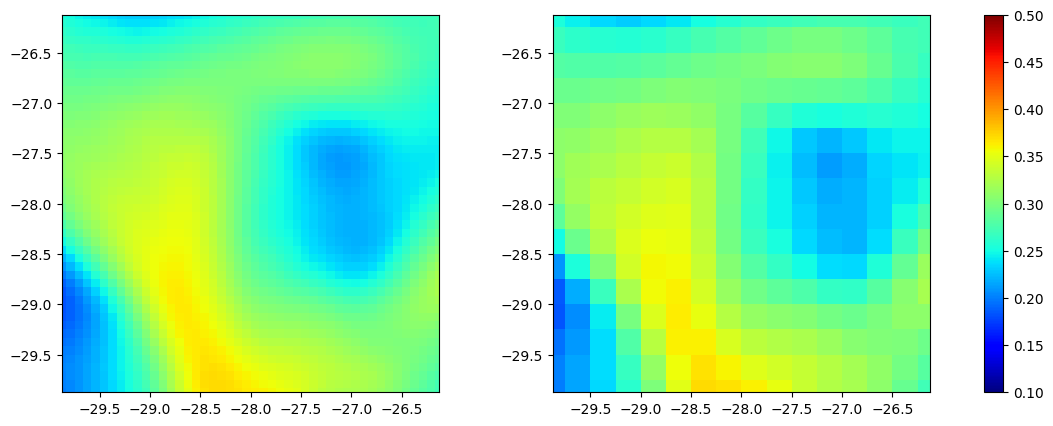

In [15]:
fig = plt.figure(figsize=(14, 7))
gs = GridSpec(1, 2, width_ratios=[1, 1], wspace=0.3)  # Define a 1x2 grid with space between subplots

ax1 = fig.add_subplot(gs[0])
c1 = ax1.pcolormesh(dat_glorys_i.longitude, dat_glorys_i.latitude, dat_glorys_i.zos.sel(time="2021-01-01T00:00:00.000000000"), 
                  vmin=0.1,vmax=.5, cmap='jet')
ax1.set_aspect('equal') 
plt.xlim(dat_aviso.longitude.min(),dat_aviso.longitude.max())
plt.ylim(dat_aviso.latitude.min(),dat_aviso.latitude.max())

ax2 = fig.add_subplot(gs[1]) 
c2 = ax2.pcolormesh(dat_dow.longitude, dat_dow.latitude, dat_dow.zos.sel(time="2021-01-01T00:00:00.000000000"), 
                  vmin=0.1,vmax=.5, cmap='jet')
ax2.set_aspect('equal')  
plt.xlim(dat_aviso.longitude.min(),dat_aviso.longitude.max())
plt.ylim(dat_aviso.latitude.min(),dat_aviso.latitude.max())

cbar = fig.colorbar(c1, ax=[ax1, ax2], location='right', shrink=0.7)



## DeepRU Model

In [16]:
import numpy as np
import dask.array as da
import xarray as xr
import zarr

from os import path

import matplotlib.pyplot as plt

import tensorflow as tf
from keras import Input
import keras.layers as layers
from keras.callbacks import EarlyStopping

In [28]:
# LeakyReLU(BatchNorm(x))
def bn_act(x, leaky_slope=0.2, act=True):
    x = layers.BatchNormalization()(x)
    if act == True:
        x = layers.LeakyReLU(alpha=leaky_slope)(x)
    return x


# x -> Conv2D -> (ReLU(BatchNorm))
# parameters: filters, kernel_size, padding, stride
def conv_block(x, filters, kernel_size=(3, 3), padding="same", strides=(1,1)):
    conv = layers.Conv2D(filters, kernel_size, padding=padding, strides=strides)(x)
    conv = bn_act(conv)
    return conv


# # 1st encode layer?
# # (x -> conv2D -> ReLU(BatchNorm) -> conv2D) + (x -> conv2D -> BN)
# def stem(x, filters, kernel_size=(3, 3), padding="same", strides=1):
#     conv = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides)(x)
#     conv = conv_block(conv, filters, kernel_size=kernel_size, padding=padding, strides=strides)
    
#     shortcut = keras.layers.Conv2D(filters, kernel_size=(1, 1), padding=padding, strides=strides)(x)
#     shortcut = bn_act(shortcut, act=False)
    
#     output = keras.layers.Add()([conv, shortcut])
#     return output


# other res blocks
# (x -> ReLU(BatchNorm) -> Conv2D -> ReLU(BatchNorm) -> Conv2D) + (x -> Conv2D -> BatchNorm)
def residual_block(x, filters, kernel_size=(3, 3), padding="same", strides=(1,1), hidden_layer_num=3):
    x_skip = x
    x_hid = x

    # x_hid = conv_block(x, filters, kernel_size, padding, strides)
    for i in range(hidden_layer_num - 1):
        x_hid = conv_block(x_hid, filters, kernel_size, padding, strides)

    x_hid = conv_block(x_hid, filters, kernel_size, padding, strides)
    
    x_out = layers.Add()([x_skip, x_hid])
    return x_out
        
    # res = conv_block(x, filters, kernel_size=kernel_size, padding=padding, strides=strides)
    # res = conv_block(res, filters, kernel_size=kernel_size, padding=padding, strides=1)
    
    # shortcut = keras.layers.Conv2D(filters, kernel_size=(1, 1), padding=padding, strides=strides)(x)
    # shortcut = bn_act(shortcut, act=False)
    
    # output = keras.layers.Add()([shortcut, res])
    # return output


def encoder(x, filters, kernel_size=(3,3), padding='same', strides=(1,1)):
    # strided convolution with the given stride, BN, LeakyReLU
    x = conv_block(x, filters, kernel_size, padding, strides)
    # residual block
    x = residual_block(x, filters)
    return x


# for decoding: upsample, concatenate, conv_block, residual
def decoder(x, x_skip, filters, kernel_size=(3,3), padding='same', up_size=(1,1)):
    x_up = layers.UpSampling2D(size=up_size)(x)
    x_concat = layers.Concatenate()([x_up, x_skip])
    # same structure as an encoder block except that the strided conv layer bacome a non-strided conv 3x3
    x_out = encoder(x_concat, filters)
    return x_out

In [83]:
# construct the DeepRU model. Strides depend on the 
def DeepRU():
    inputs = Input(shape=(16, 16, 1))  #  figure out how to deal with input shape later

    input_conv = layers.Conv2D(filters=32, kernel_size=(3,3), padding='same')(inputs)
    # interpolate the low-res input to the expected output / high-res dim
    input_up = layers.UpSampling2D(size=(3, 3), # height multiple, width multiple
                                      interpolation='bilinear',
                                      )(input_conv)
    
    ec1 = encoder(input_up, 64, strides=(3,1))  # 16 x 48
    ec2 = encoder(ec1, 128, strides=(1,3))  # 16 x 16
    ec3 = encoder(ec2, 256, strides=(2,2))  # 8 x 8
    bn = encoder(ec3, 512, strides=(2,2))  # 4 x 4
    # ... add more ec

    # bottleneck
    # bn = encoder(ecx, some_filter_num, stides=())

    dc1 = decoder(bn, ec3, 512, up_size=(2,2))  # 4 x 4
    dc2 = decoder(dc1, ec2, 256, up_size=(2,2))  # 8 x 8
    dc3 = decoder(dc2, ec1, 128, up_size=(1,3))  # 16 x 16
    dc4 = decoder(dc3, input_up, 64, up_size=(3,1))

    # # ... add more dc (num of ec + 1)

    outputs = layers.Conv2D(filters=1, kernel_size=(3,3), padding='valid')(dc4)
    # outputs=bn
    
    deepRU_model = tf.keras.Model(inputs, outputs, name='DeepRU')
    deepRU_model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # compile here or outside the fn?
    return deepRU_model

In [84]:
model = DeepRU()

In [85]:
model.summary()

Model: "DeepRU"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 16, 16, 1)]  0           []                               
                                                                                                  
 conv2d_188 (Conv2D)            (None, 16, 16, 32)   320         ['input_12[0][0]']               
                                                                                                  
 up_sampling2d_18 (UpSampling2D  (None, 48, 48, 32)  0           ['conv2d_188[0][0]']             
 )                                                                                                
                                                                                                  
 conv2d_189 (Conv2D)            (None, 16, 48, 64)   18496       ['up_sampling2d_18[0][0]']  

In [77]:
dat_highres = dat_glorys_i.sel(time=slice("2010", "2021")).zos.data[..., np.newaxis]
dat_lowres = dat_dow.sel(time=slice("2010", "2021")).zos.data[..., np.newaxis]

In [80]:
from sklearn.model_selection import train_test_split

random_state = 42

X_train, X_test, y_train, y_test = train_test_split(dat_lowres, dat_highres, test_size=0.15, random_state=random_state, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_state, shuffle=True)

In [81]:
X_train.shape

(2855, 16, 16, 1)

In [86]:
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(x=X_train, 
                    y=y_train, 
                    epochs=50, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stop])

Epoch 1/50
90/90 [==============================] - 25s 125ms/step - loss: 0.1711 - mae: 0.1089 - val_loss: 0.0238 - val_mae: 0.1316
Epoch 2/50
90/90 [==============================] - 10s 110ms/step - loss: 0.0014 - mae: 0.0259 - val_loss: 0.0055 - val_mae: 0.0609
Epoch 3/50
90/90 [==============================] - 10s 110ms/step - loss: 8.8753e-04 - mae: 0.0212 - val_loss: 0.0023 - val_mae: 0.0385
Epoch 4/50
90/90 [==============================] - 10s 112ms/step - loss: 6.5679e-04 - mae: 0.0182 - val_loss: 0.0023 - val_mae: 0.0385
Epoch 5/50
90/90 [==============================] - 10s 110ms/step - loss: 7.1376e-04 - mae: 0.0196 - val_loss: 0.0015 - val_mae: 0.0306
Epoch 6/50
90/90 [==============================] - 10s 111ms/step - loss: 5.2935e-04 - mae: 0.0169 - val_loss: 4.5499e-04 - val_mae: 0.0165
Epoch 7/50
90/90 [==============================] - 10s 112ms/step - loss: 5.5845e-04 - mae: 0.0167 - val_loss: 2.6894e-04 - val_mae: 0.0123
Epoch 8/50
90/90 [=======================

In [90]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [91]:
def plot_losses(history):
    history_keys = list(history.history.keys())
    plot_num = len(history_keys) // 2
    plt.figure(figsize=(5 * plot_num, 4))
    for i in range(plot_num):
        plt.subplot(1, plot_num, i + 1)
        train_key = history_keys[i]
        val_key = history_keys[i + plot_num]
        plt.plot(history.history[train_key], label=f'Train {train_key}')
        plt.plot(history.history[val_key], label=f'Validation {val_key[4:]}')
        plt.title(train_key)
        plt.xlabel('Epoch')
        plt.ylabel(train_key)
        plt.legend(loc='upper right')
        plt.grid(True)
    plt.show()

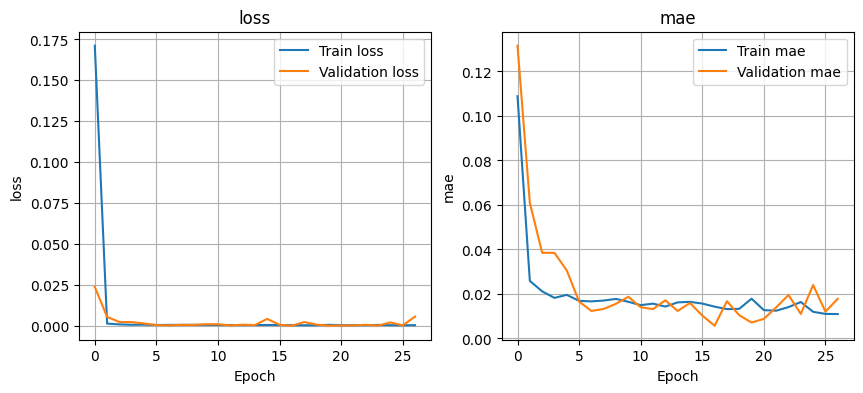

In [92]:
plot_losses(history)

In [93]:
def test_loss(X_test, y_test, model, print_loss=True):
    # Prepare test dataset
    test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
    test_dataset = test_dataset.batch(4)

    # Evaluate the model on the test dataset
    test_mse, test_mae = model.evaluate(test_dataset)
    if print_loss:
        print(f"Test MSE: {test_mse}")
        print(f"Test MAE: {test_mae}")
    return test_mse, test_mae

In [94]:
test_mse, test_mae = test_loss(X_test, y_test, model)

158/158 [==============================] - 2s 10ms/step - loss: 8.5413e-05 - mae: 0.0060
Test MSE: 8.541318675270304e-05
Test MAE: 0.005976530723273754


In [117]:
model_name = 'DeepRU_mse'
model_path = f'E:/24SU OHW/Project/ohw24_proj_upSSH_us/contributor_folders/team_member_3/models/{model_name}.keras'
model.save(model_path)

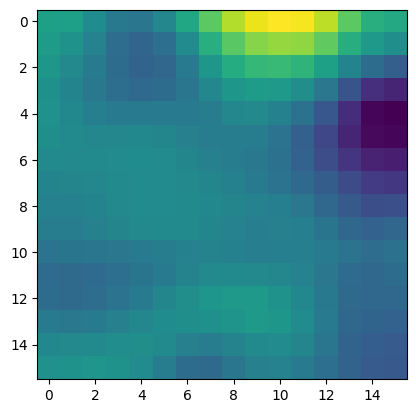

In [96]:
plt.imshow(X_test[0,:,:,0])

In [103]:
X_test[0][np.newaxis, ...].shape

(1, 16, 16, 1)

In [108]:
pred = model.predict(X_test[0][np.newaxis, ...])

1/1 [==============================] - 0s 254ms/step


In [112]:
pred = pred[0][:,:,0]

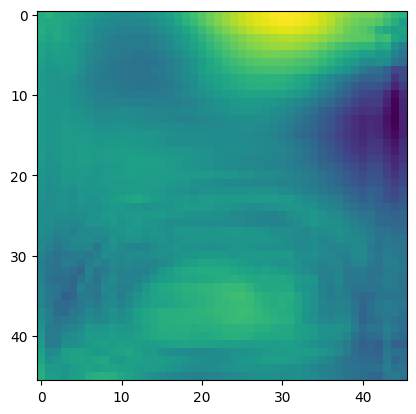

In [113]:
plt.imshow(pred)

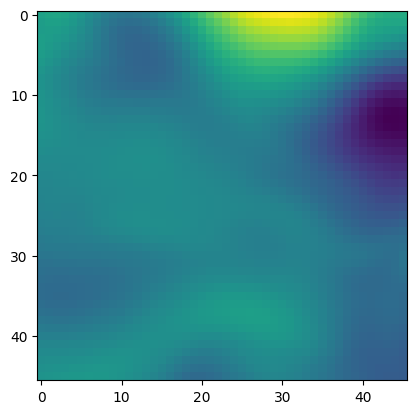

In [116]:
plt.imshow(y_test[0,:,:,0])

## SWOT

In [ ]:
swot = xr.open_dataset('SWOT_L3_LR_SSH_Basic_500_027_20230424T160658_20230424T165803_v1.0.nc')

In [115]:
swot

<xarray.Dataset> Size: 27MB
Dimensions:         (num_lines: 9860, num_pixels: 69, num_nadir: 0)
Coordinates:
    latitude        (num_lines, num_pixels) float64 5MB -77.05 -77.07 ... 77.05
    longitude       (num_lines, num_pixels) float64 5MB 324.6 324.6 ... 131.6
Dimensions without coordinates: num_lines, num_pixels, num_nadir
Data variables:
    time            (num_lines) datetime64[ns] 79kB 2023-04-24T16:06:58.03200...
    mdt             (num_lines, num_pixels) float64 5MB -1.001 ... -0.0468
    ssha            (num_lines, num_pixels) float64 5MB nan nan nan ... nan nan
    ssha_noiseless  (num_lines, num_pixels) float64 5MB ...
    i_num_line      (num_nadir) int16 0B ...
    i_num_pixel     (num_nadir) int8 0B ...
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_min:              -78.272196
    geospatial_lat_max:              78.272247
    geospatial_lon_min:              0.001466
    geospatial_lon_max:              359.9997
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0 (NASA/CNES). D...
    doi:                             https://doi.org/10.24400/527896/A01-2023...

In [ ]:
plt.scatter(x=swot.longitude, y=swot.latitude, c=swot.mdt, marker='.')
plt.colorbar()
plt.xlim(45,50)
plt.ylim(-10,10)

In [ ]:
swot.time.values

In [ ]:
dats = dat.zos.expand_dims({'NewDim':1}).transpose("time", "latitude", "longitude","NewDim")
dats_dow = dat_dow.zos.expand_dims({'NewDim':1}).transpose("time", "latitude", "longitude","NewDim")

In [ ]:
X_train, X_test, y_train, y_test = dats_dow[:-365], dats_dow[-365:], dats[:-365], dats[-365:]

In [ ]:
X_train.shape,y_train.shape

In [ ]:
X_test.shape,y_test.shape

In [ ]:
batch_size = 64
dataset = tf.data.Dataset.from_tensor_slices((X_train.astype('float32'), y_train.astype('float32')))
dataset = dataset.shuffle(buffer_size=256).batch(batch_size)


In [ ]:
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Concatenate, Conv2D, Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import GlobalAveragePooling2D, Input, UpSampling2D


def create_generator(
    block_widths=(128,64,32),
    input_shape=(4,4,1),
    noise_shape=(4,4,8)
):
    # inputs (concatenated)
    input_lr = Input(shape=input_shape)
    input_noise = Input(shape=noise_shape)
    x = Concatenate()([input_lr, input_noise])

    x = Conv2D(
        block_widths[0], kernel_size=(3,3), padding='same'
    )(x)
    x = LeakyReLU(0.2)(x)
    # upsampling stages
    for width in block_widths:
        x = UpSampling2D(interpolation='bilinear')(x)
        x = Conv2D(
            width, kernel_size=(3,3), padding='same'
        )(x)
        x = LeakyReLU(0.2)(x)

    # final projection to output space
    output = Conv2D(1, kernel_size=(1,1))(x)

    return Model(inputs=[input_lr, input_noise], outputs=output)


def create_discriminator(
    block_widths=(32,64,128),
    input_shape_hr=(32,32,1),
    input_shape_lr=(4,4,1),
    postproc_convs=2,
    output_activation='linear' # 'linear' when using 'from_logits' in loss
):
    # inputs
    input_hr = Input(shape=input_shape_hr)
    input_lr = Input(shape=input_shape_lr)

    # Convolution steps for both HR and LR inputs
    x_hr = Conv2D(
        block_widths[0], kernel_size=(3,3), padding='same', activation='relu'
    )(input_hr)
    x_hr = LeakyReLU(0.2)(x_hr)
    x_lr = Conv2D(
        block_widths[0], kernel_size=(3,3), padding='same', activation='relu'
    )(input_lr)
    x_lr = LeakyReLU(0.2)(x_lr)
    for width in block_widths:
        x_hr = Conv2D( # downsample HR samples on each loop
            width, kernel_size=(3,3), padding='same', strides=2,
        )(x_hr)
        x_hr = LeakyReLU(0.2)(x_hr)
        x_lr = Conv2D(
            width, kernel_size=(3,3), padding='same'
        )(x_lr)
        x_lr = LeakyReLU(0.2)(x_lr)

    # Concatenate HR and LR branches and do some joint processing
    x = Concatenate()([x_hr, x_lr])
    for _ in range(postproc_convs):
        x = Conv2D(block_widths[-1], kernel_size=(3,3), padding='same')(x)
        x = LeakyReLU(0.2)(x)

    # Pool to get outputs
    x = GlobalAveragePooling2D()(x)
    output = Dense(1, activation=output_activation)(x)

    return Model(inputs=[input_lr, input_hr], outputs=output)


generator = create_generator()
discriminator = create_discriminator()


In [ ]:
generator.summary()
discriminator.summary()

In [ ]:
# Adapted from https://keras.io/examples/generative/conditional_gan/

class DownscalingGAN(Model):
    def __init__(self, discriminator, generator, noise_shape=(4,4,8)):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.noise_shape = noise_shape
        self.gen_loss_tracker = keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = keras.metrics.Mean(name="discriminator_loss")
        self.step_number = tf.Variable(0)

    @property
    def metrics(self):
        return [self.gen_loss_tracker, self.disc_loss_tracker]

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, data):
        # Unpack the data.
        (samples_lr, samples_hr) = data

        # Sample noise for the generator.
        batch_size = tf.shape(samples_hr)[0]
        noise = tf.random.normal(
            shape=(batch_size,)+self.noise_shape
        )

        def train_discriminator():
            # Generate fake samples.
            samples_gen = self.generator([samples_lr, noise])

            # Combine them with real images.
            combined_samples_hr = tf.concat([samples_gen, samples_hr], axis=0)
            combined_samples_lr = tf.concat([samples_lr, samples_lr], axis=0)

            # Assemble labels discriminating real from fake images.
            labels = tf.concat(
                [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
            )

            # Train the discriminator.
            with tf.GradientTape() as tape:
                predictions = self.discriminator(
                    [combined_samples_lr, combined_samples_hr]
                )
                d_loss = self.loss_fn(labels, predictions)
            grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
            self.d_optimizer.apply_gradients(
                zip(grads, self.discriminator.trainable_weights)
            )

            # Monitor loss.
            self.disc_loss_tracker.update_state(d_loss)

        def train_generator():
            # Create labels that say "all real images".
            misleading_labels = tf.zeros((batch_size, 1))

            # Train the generator (note that we should *not* update the weights
            # of the discriminator)!
            with tf.GradientTape() as tape:
                samples_gen = self.generator([samples_lr, noise])
                predictions = self.discriminator([samples_lr, samples_gen])
                g_loss = self.loss_fn(misleading_labels, predictions)
            grads = tape.gradient(g_loss, self.generator.trainable_weights)
            self.g_optimizer.apply_gradients(
                zip(grads, self.generator.trainable_weights)
            )

            # Monitor loss.
            self.gen_loss_tracker.update_state(g_loss)
        
        # If we trained the generator now, train the discriminator next
        # or vice versa.
        
        tf.cond(
            self.step_number % 2 == 0,
            train_discriminator,
            train_generator
        )        
        self.step_number.assign(self.step_number+1)

        return {
            "g_loss": self.gen_loss_tracker.result(),
            "d_loss": self.disc_loss_tracker.result(),
        }

gan = DownscalingGAN(discriminator, generator)

gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    g_optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    loss_fn=keras.losses.BinaryCrossentropy(from_logits=True),
)



In [ ]:
dataset

In [ ]:
gan.fit(dataset, epochs=30)

In [ ]:
from matplotlib import colors, gridspec, pyplot as plt

def plot_precip(ax, logR):
    ax.imshow(R, norm=colors.LogNorm(0.1,100,clip=True))
    ax.tick_params(left=False, bottom=False,
        labelleft=False, labelbottom=False)

def plot_samples(samples, labels=None):
    """ Plot a grid with many images.
    """
    N_variables = len(samples)
    N_samples = len(samples[0])
    fig = plt.figure(figsize=(N_samples*1.5, N_variables*1.5))
    gs = gridspec.GridSpec(N_variables, N_samples, hspace=0.02, wspace=0.02)

    for (i,variable) in enumerate(samples):
        for (j,sample) in enumerate(variable):
            ax = fig.add_subplot(gs[i,j])
            plot_precip(ax, sample)
            if (j == 0) and (labels is not None):
                ax.set_ylabel(labels[i])

    fig.show()

In [ ]:
rng = np.random.RandomState(seed=15)
num_samples = 8

# Selection of interesting samples from the test set
indices = [2,5,14,16,17,19,28,37]

# Uncomment to use a random selection (change seed for a different selection):
# indices = rng.choice(samples.shape[0], num_samples, replace=False)

noise = rng.randn(num_samples, 4, 4, 8)
samples_gen_1 = generator.predict_on_batch(
    [X_test[indices,...], noise]
)
noise = rng.randn(num_samples, 4, 4, 8)
samples_gen_2 = generator.predict_on_batch(
    [X_test[indices,...], noise]
)
plot_samples(
    [
        X_test[indices,...], y_test[indices,...], 
        samples_gen_1, samples_gen_2    
    ],
    labels=["LR samples", "HR samples", "Gen. samples 1", "Gen. samples 2"]
)
